# Searching for Cointegrated Stocks

In the last notebook, we have tried to identify if two stocks are suitable for pairs trading using cointegration. We saw the selected stocks were not suitable and the question remained on how to find cointegrated stocks?

Well, I dont really have a proper answert to this but let's try what everyone in programming would do without an answer: apply a brute force algorithm.

In detail, we would pick a set of stocks and run the **Engle-Granger Test** on each pairwise combination.

**Note, the following search uses a window of 5 years and while the results seem interesting, its important to keep in mind that a different observation window would most probably yield different results!**

Again, I am not a trader and this is not an invenstment advice but rather a fun exercise. So, please do not use the results as a trading strategy :)


## Picking Stocks

Where to start? Maybe an index? How abou the German M-Dax representing the major technology companies?! 

In [1]:
from helper import helpers

# only 26 our of 27 selected to drop the stocks that have less than 5y of data
m_dax_ticker_list = ["FRA.DE", "GIL.DE", "LXS.DE", "AOX.DE", "FPE3.DE",
                     "GXI.DE", "1COV.DE", "AIR.DE", "KRN.DE", "BNR.DE", "G1A.DE", "HOT.DE",
                     "HLE.DE", "EVK.DE", "DUE.DE", "DEQ.DE", "DWNI.DE", "HNR1.DE", "GBF.DE",
                     "KGX.DE", "LEG.DE", "FIE.DE", "BOSS.DE", "JUN3.DE", "EVD.DE", "MTX.DE"]


def place_all_tickers_into_df(ticker_list):
    # fetch all the historical ticker values and place them into a DataFrame
    all_ticker_values = pd.DataFrame()
    for item in ticker_list:
        ticker = helpers.fetch_ticker(item)
        ticker_hist = helpers.fetch_ticker_hist(ticker, "5y")
        all_ticker_values[item] = ticker_hist["Close"]
    return all_ticker_values


In [146]:
m_dax_df = place_all_tickers_into_df(m_dax_ticker_list)

Lets see what we have

In [147]:
m_dax_df

,FRA.DE,GIL.DE,LXS.DE,AOX.DE,FPE3.DE,GXI.DE,1COV.DE,AIR.DE,KRN.DE,BNR.DE,...,DWNI.DE,HNR1.DE,GBF.DE,KGX.DE,LEG.DE,FIE.DE,BOSS.DE,JUN3.DE,EVD.DE,MTX.DE
Date,,,,,,,,,,,,,,,,,,,,,
2019-05-03 00:00:00+02:00,70.964478,38.890568,45.459541,5.692834,32.297882,63.684261,42.204231,114.278900,77.164185,42.365486,...,37.581402,124.929184,25.545176,56.327736,90.305626,55.928917,58.948891,27.313871,44.701714,202.314896
2019-05-06 00:00:00+02:00,70.317093,38.581913,44.254314,5.676523,31.882696,63.684261,41.296051,114.355309,75.209480,41.700058,...,37.525429,123.617096,25.078453,54.468124,89.697205,55.295933,57.416550,26.078201,44.488567,200.474777
2019-05-07 00:00:00+02:00,69.688751,38.846474,42.575916,5.700989,30.740938,63.545219,39.567009,112.387634,72.091278,41.096737,...,38.701008,125.210342,24.331701,52.924644,91.522446,56.154984,56.585766,26.078201,44.120415,197.859894
2019-05-08 00:00:00+02:00,69.783958,38.581913,42.558056,5.668366,31.105316,63.962364,39.383625,113.610275,72.603210,41.327423,...,38.728996,126.616142,22.947096,53.538311,91.044403,56.652332,56.401142,26.520830,44.023533,197.472488
2019-05-09 00:00:00+02:00,69.155609,38.052795,41.593876,5.696913,30.643179,63.081726,38.143612,111.489746,70.369270,39.606186,...,38.812965,119.982063,21.932592,51.567123,93.651878,56.290623,54.998039,25.432701,44.082466,193.695435
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2024-04-26 00:00:00+02:00,46.471504,43.170002,25.770000,3.490000,44.240002,100.500000,48.070000,157.080002,124.000000,74.860001,...,17.000000,230.399994,44.750000,43.810001,76.919998,43.099998,50.740002,35.520000,82.150002,223.399994
2024-04-29 00:00:00+02:00,46.491081,43.170002,26.510000,3.500000,43.340000,100.400002,47.549999,155.919998,125.599998,75.279999,...,17.299999,232.500000,44.750000,44.259998,77.519997,43.450001,51.400002,35.259998,83.050003,225.100006
2024-04-30 00:00:00+02:00,46.080002,43.170002,26.530001,3.420000,43.820000,101.000000,46.980000,154.639999,123.599998,74.860001,...,17.740000,232.399994,43.700001,43.380001,79.919998,43.849998,50.540001,34.880001,83.199997,226.600006


=> the DataFrame hold all the close values from the past 5 years. Now, lets see if there are some cointegrated pairs present.

## Test for Pairwise Cointegration

In [148]:
# using the stats library to make things easier
from statsmodels.tsa.stattools import coint

# NOTE: the algorithm used here is not the smartest but the most simple approach
def get_pairwise_p_val(df):
    results_dict = {}
    # iterate through each columns within the DataFrame
    for first_column_name, first_column_data in df.items():
        # iterate again, so we can get all combinations of colums (representing the ticker close values)
        for second_column_name, second_column_data in df.items():
            # skip same column
            if first_column_name == second_column_name:
                continue
            # run Engle-Granger Test on each column pair
            _, p_val, _, = coint(first_column_data.values, second_column_data.values)
            # store results in dict
            results_dict[first_column_name + "--" + second_column_name] = p_val
    return results_dict

In [149]:
m_dax_p =  get_pairwise_p_val(m_dax_df)

=> Now we got all the pairwise combinations of the stocks

Let's place them into a DataFrame and check for the smallest / largest p-values resulting from the Engle-Granger Test.

In [150]:
# using a DataFrame to ease up operations
m_dax_p_df = pd.DataFrame(m_dax_p , index=[0])

In [151]:
# the largest values
m_dax_p_df.apply(lambda x: x.nlargest(3), axis=1)

,KRN.DE--DUE.DE,GIL.DE--FRA.DE,GIL.DE--DUE.DE
0,0.986502,0.983003,0.980605


In [152]:
# the smallest values
m_dax_p_df.apply(lambda x: x.nsmallest(3), axis=1)

,HLE.DE--KRN.DE,KRN.DE--HLE.DE,EVK.DE--KGX.DE
0,0.001123,0.001421,0.005276


## Visual Inspection

Lets have a closer look into the combination resulting into the largest and the smallest p-values.


### KRN.DE--DUE.DE

* KRN.DE aka. Krones AG
* DUE.DE aka. Duerr AG

Both are manufacturers of specialized industial machines and although both seem to be within the same industry, their combination is not cointegrated.

Let's plot both on their corresponding axes


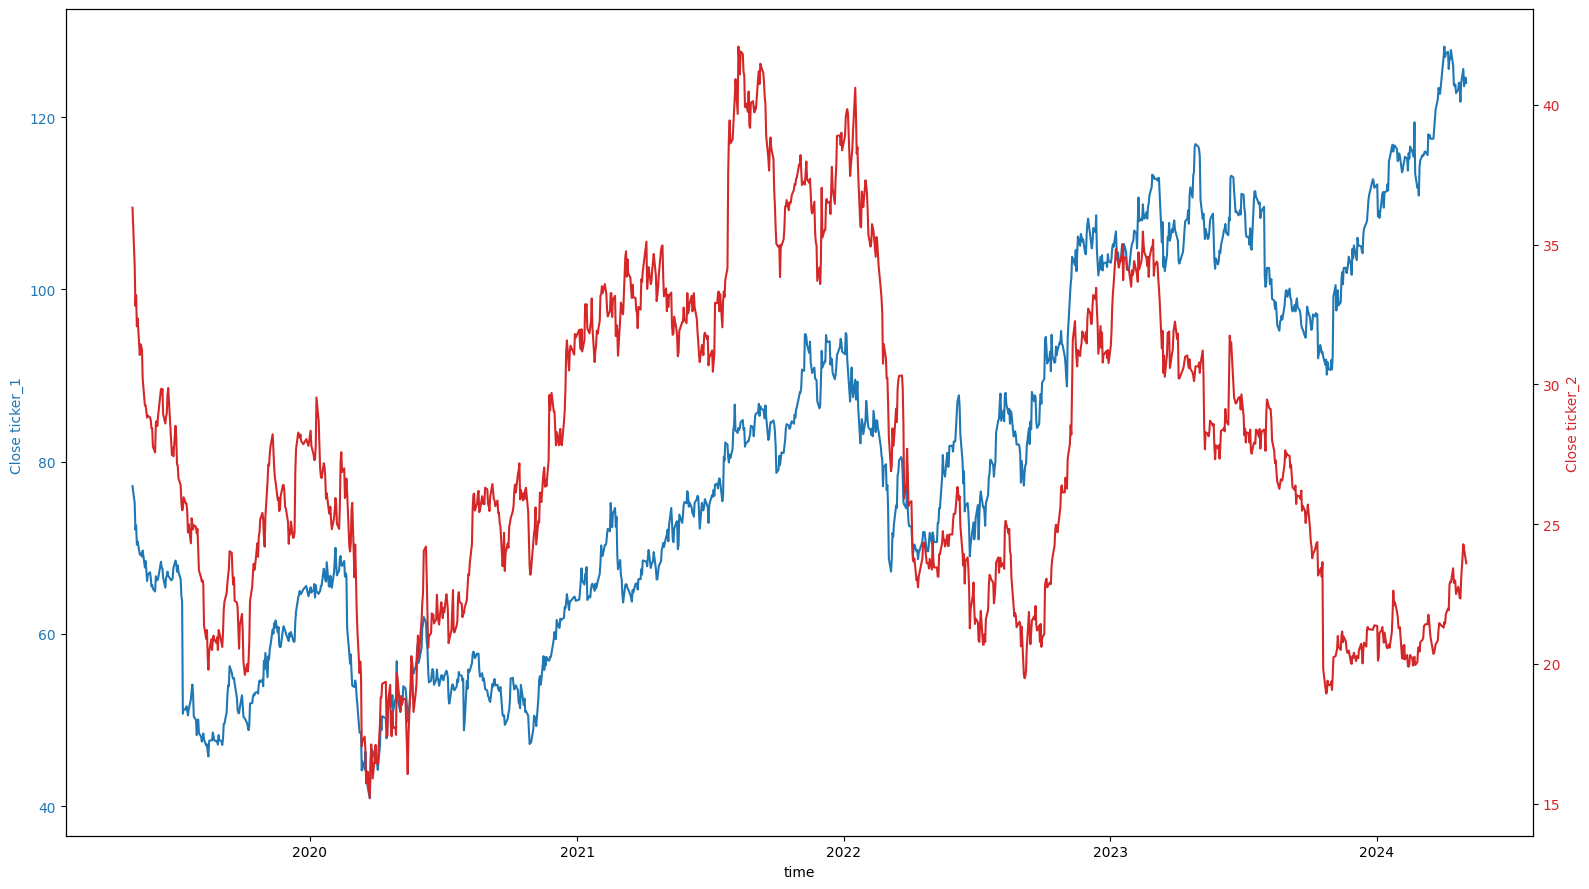

In [153]:
ticker_krn = helpers.fetch_ticker("KRN.DE")
ticker_hist_krn = helpers.fetch_ticker_hist(ticker_krn, "5y")


ticker_due = helpers.fetch_ticker("DUE.DE")
ticker_hist_due = helpers.fetch_ticker_hist(ticker_due, "5y")


helpers.plot_at_once(ticker_hist_krn, ticker_hist_due)

### HLE.DE--KRN.DE

HLE.DE, aka HELLA AG is a light components and electronics manufacturer

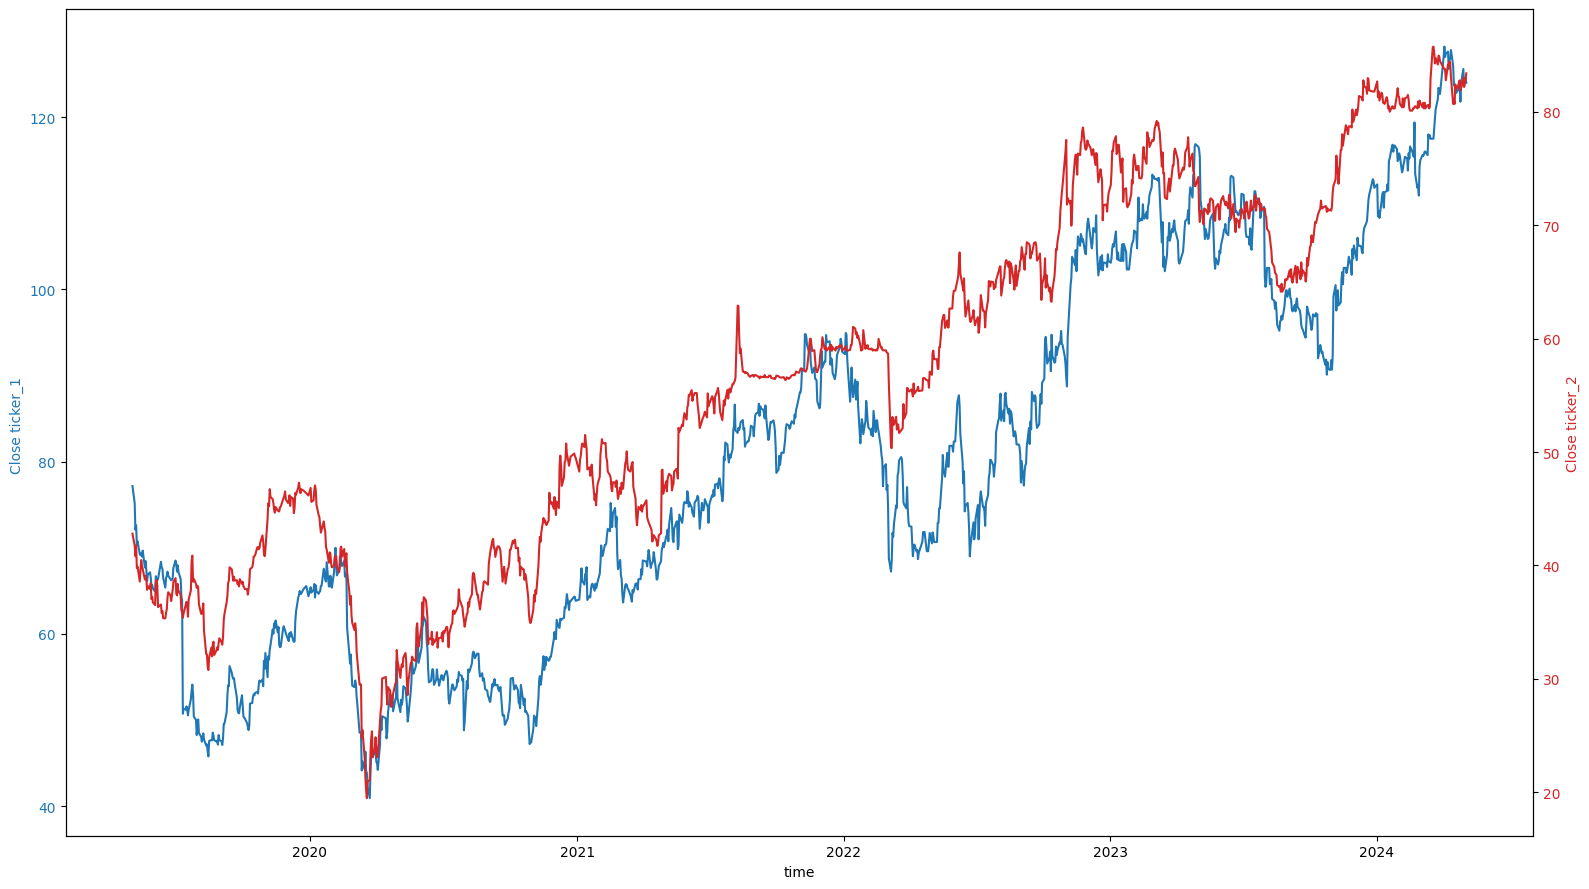

In [154]:
ticker_hle = helpers.fetch_ticker("HLE.DE")
ticker_hist_hle = helpers.fetch_ticker_hist(ticker_hle, "5y")


helpers.plot_at_once(ticker_hist_krn, ticker_hist_hle)

### => Now that looks more like a pair of cointegrated stocks!!

Although the companies are somewhat unrelated, their p-values shows a stationary spread and hence, high cointegration !!

## More Searches

We have run the cointegration search on the M-Dax. Let's try the same on the more popular index: the DAX index, containing the major German companies.

In [155]:

dax_ticker_list = ["FRE.DE", "SY1.DE", "IFX.DE", "DTE.DE", "P911.DE", "BAYN.DE", "1COV.DE", "ADS.DE", "AIR.DE", "RWE.DE", "BMW.DE",
                   "CON.DE", "BEI.DE", "DHL.DE", "EOAN.DE", "BAS.DE", "HNR1.DE", "VOW3.DE", "HEI.DE", "MRK.DE", "DB1.DE", "ALV.DE",
                   "ZAL.DE", "SHL.DE", "SIE.DE", "DBK.DE", "MTX.DE", "ENR.DE", "VNA.DE", "DTG.DE"]


In [156]:
dax_df = place_all_tickers_into_df(dax_ticker_list)

In [158]:
dax_p =  get_pairwise_p_val(dax_df.dropna())

In [159]:
# using a DataFrame to ease up operations
dax_p_df = pd.DataFrame(dax_p , index=[0])
# the largest values
dax_p_df.apply(lambda x: x.nlargest(4), axis=1)

,BAYN.DE--MTX.DE,BAYN.DE--VOW3.DE,BAYN.DE--ENR.DE,BAYN.DE--IFX.DE
0,0.98873,0.988059,0.987767,0.987649


In [161]:
# the smallest values
dax_p_df.apply(lambda x: x.nsmallest(10), axis=1)

,VOW3.DE--MTX.DE,MTX.DE--VOW3.DE,IFX.DE--DHL.DE,DHL.DE--IFX.DE,AIR.DE--HEI.DE,AIR.DE--BEI.DE,HEI.DE--AIR.DE,DTG.DE--BEI.DE,BEI.DE--AIR.DE,HEI.DE--BEI.DE
0,0.00002,0.000258,0.000609,0.001527,0.004277,0.005212,0.008228,0.009658,0.010432,0.013096


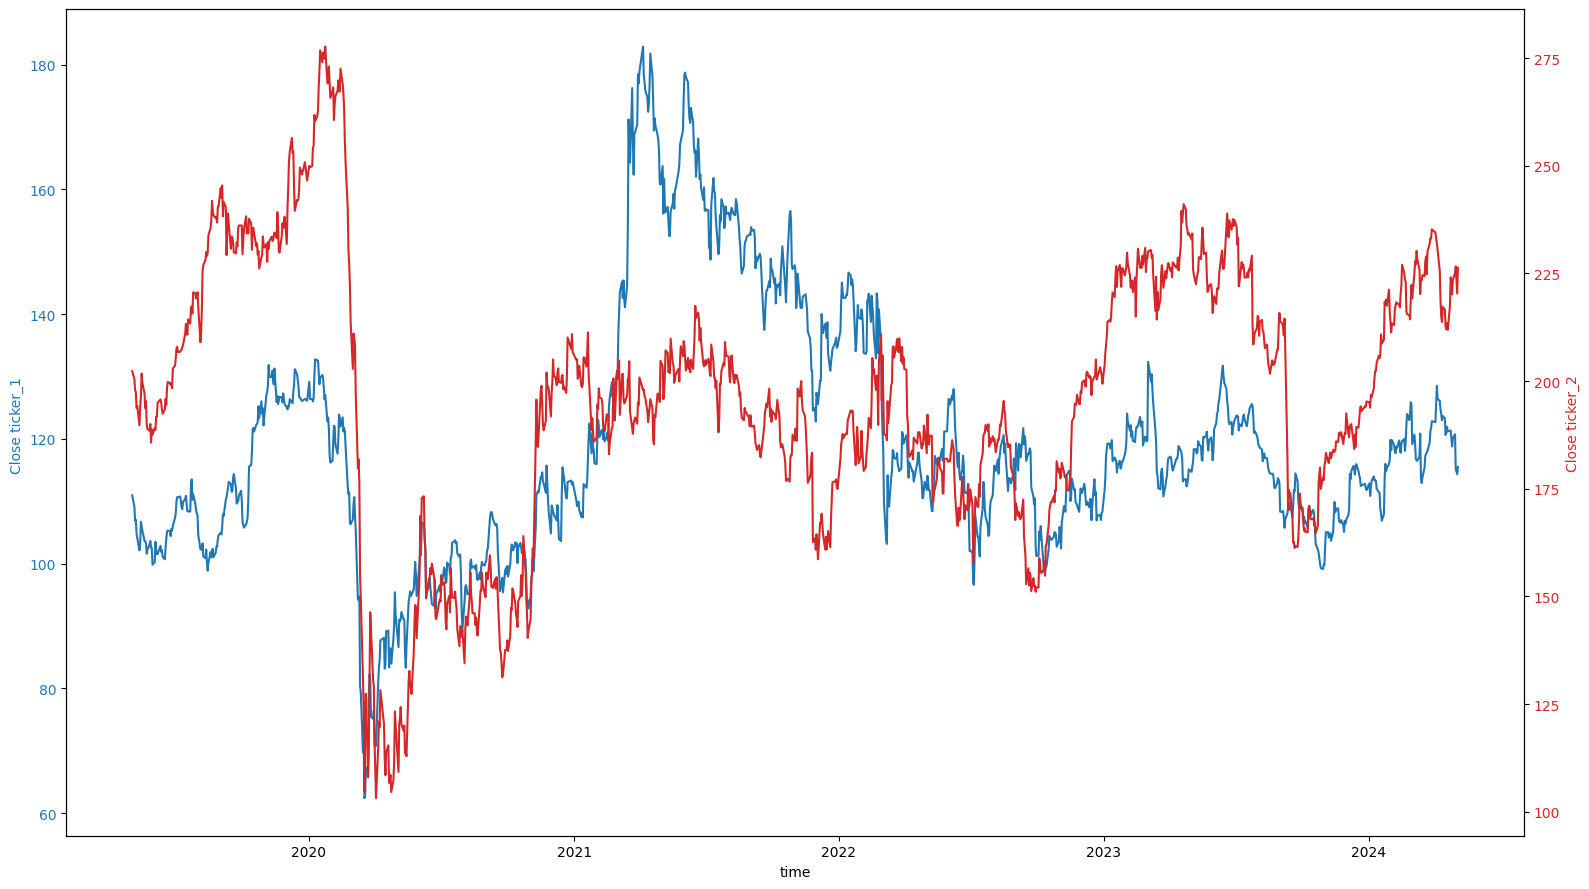

In [162]:
ticker_vw = helpers.fetch_ticker("VOW3.DE")
ticker_hist_vw = helpers.fetch_ticker_hist(ticker_vw, "5y")


ticker_mtx = helpers.fetch_ticker("MTX.DE")
ticker_hist_mtx = helpers.fetch_ticker_hist(ticker_mtx, "5y")


helpers.plot_at_once(ticker_hist_vw, ticker_hist_mtx)

**=> we can see that Volkswagen and MTU Aero Engines, two unrelated stocks (at least at first glance) are cointegrated!**

The plot also shows the covergence and divergence points clearly.

Now, since we have chosen 5 years as our obervation window, applying pairs trading will only work for longer time horizons... 